<img src="https://github.com/ksang/word2vec/raw/master/imgs/model.jpg" height=400, width=800>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing dataset and text preprocessing

In [5]:
dataset = pd.read_csv('../../data/Corona_NLP.csv', encoding='latin1')

In [6]:
dataset.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [7]:
# Very basic text preprocessing by removing punctuations, numbers. We have also cleaned the data by removing 
# characters including and after 'https' in the text.

import re 
texts=[]
for i in range(0, len(dataset)):
  text = re.sub('[^a-zA-Z]' , ' ', dataset['OriginalTweet'][i])
  text = text.lower()
  text = text.split()
  x = len(text) if text.count('https') ==0  else text.index('https') 
  text = text[: x ]
  text = [t for t in text if not t=='https']
  text = ' '.join(text)
  texts.append(text)

In [8]:
len(texts)

41157

In [11]:
texts[:10]

['menyrbie phil gahan chrisitv',
 'advice talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist gp set up online shopping accounts if poss adequate supplies of regular meds but not over order',
 'coronavirus australia woolworths to give elderly disabled dedicated shopping hours amid covid outbreak',
 'my food stock is not the only one which is empty please don t panic there will be enough food for everyone if you do not take more than you need stay calm stay safe covid france covid covid coronavirus confinement confinementotal confinementgeneral',
 'me ready to go at supermarket during the covid outbreak not because i m paranoid but because my food stock is litteraly empty the coronavirus is a serious thing but please don t panic it causes shortage coronavirusfrance restezchezvous stayathome confinement',
 'as news of the region s first confirmed covid case came out of sullivan county last week people floc

### Training the word2vec model

In [9]:
from gensim.models import Word2Vec

#### CBOW

In [19]:
sentences = [line.split() for line in texts]

cbow =Word2Vec(sentences=sentences, vector_size=100, window=5, workers=4, min_count=5)

In [30]:
words = list(cbow.wv.index_to_key)

In [34]:
words[:10]

['the', 'to', 'and', 'of', 'covid', 'a', 'in', 'coronavirus', 'for', 'is']

In [35]:
print(len(words))

10630


In [37]:
print(cbow.wv['computer'])

[ 0.08413184  0.06649185  0.05798118 -0.04749746  0.05054245 -0.2201294
 -0.06195701  0.24929693 -0.01556018 -0.06134135 -0.04434902 -0.1769579
 -0.02913246  0.04349489  0.15333219 -0.10004305  0.08009881 -0.24555126
  0.02158297 -0.3069193   0.2517111   0.03129218  0.12936468 -0.02331728
 -0.02725531 -0.00746032 -0.2702606  -0.02856177 -0.03371175 -0.04369194
  0.14821942 -0.00319835  0.11273895 -0.21871988 -0.11162877  0.12346874
 -0.1751721  -0.13132979 -0.08051021 -0.08587988 -0.1093226  -0.10294854
  0.07213271  0.06595592  0.17097528 -0.09070779 -0.11663095  0.00189252
  0.02846981  0.13337454  0.05272647 -0.0918892  -0.06422709 -0.03434449
 -0.02180996  0.0111358   0.09971569  0.07690527 -0.09416234  0.0913572
  0.00549979 -0.00472119  0.09766274 -0.05186756 -0.2935765   0.13834758
  0.06915451  0.2890573  -0.1679559   0.29604813  0.05280517 -0.02041102
  0.18766074 -0.09062875  0.05738558  0.0416038  -0.06513416  0.05239771
 -0.03980264  0.05309687 -0.03831604  0.00584583 -0.26

In [40]:
### We can also find out the similarity between given words (the cosine distance between their vectors).
cbow.wv.similarity('vladimir', 'putin')

0.86544263

In [41]:
cbow.wv.similarity('vladimir', 'modi')

0.81334007

In [42]:
# We can also find the most similar words to a given word.
print(cbow.wv.most_similar('pay'))

[('paid', 0.7184774279594421), ('wages', 0.6870037317276001), ('receive', 0.6820783019065857), ('minimum', 0.6790280342102051), ('bills', 0.676755428314209), ('leave', 0.6689574718475342), ('raise', 0.6655681729316711), ('provide', 0.6563509106636047), ('wage', 0.6430478096008301), ('hazard', 0.6412681937217712)]


In [43]:
print(cbow.wv.most_similar('covid'))

[('coronavirus', 0.6800086498260498), ('coronacrisis', 0.6207243800163269), ('corona', 0.6045094728469849), ('virus', 0.5714198350906372), ('coronaviruspandemic', 0.5527095794677734), ('disease', 0.550549328327179), ('stayathome', 0.5378566384315491), ('coronavirusuk', 0.5342407822608948), ('globalpandemic', 0.5330847501754761), ('coronavirusupdate', 0.5313635468482971)]


In [44]:
print(cbow.wv.most_similar('india'))

[('nigeria', 0.8301569819450378), ('yemen', 0.7741296887397766), ('induced', 0.7673357129096985), ('oilprice', 0.7650848031044006), ('pakistan', 0.763910174369812), ('oilprices', 0.7552645206451416), ('slowdown', 0.754508912563324), ('usa', 0.7531763315200806), ('kenya', 0.7462401390075684), ('saudiarabia', 0.7404502034187317)]


In [45]:
# Similarly, we can use the same function to find analogies of the form: if x:y, then z:?. Here we enter the known
# relation x,y in the positive parameter, and the term who’s analogy has to be found in the negative parameter.
print(cbow.wv.most_similar(positive=['russian', 'russia'], negative=['arab']))

[('arabia', 0.88653165102005), ('saudi', 0.8845890164375305), ('opec', 0.8435678482055664), ('output', 0.7762780785560608), ('war', 0.7734721302986145), ('cuts', 0.7734152674674988), ('putin', 0.7570710778236389), ('crude', 0.752779483795166), ('oil', 0.752558171749115), ('president', 0.7505783438682556)]


In [46]:
# We also have this method which works similar to an "odd one out" situation.
cbow.wv.doesnt_match(['grocery', 'covid', 'coronavirus'])

'grocery'

**Visualizing CBOW**

In [61]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.wv.key_to_index), sample)
        else:
            words = [word for word in model.wv.index_to_key]
        
    word_vectors = np.array([model.wv[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

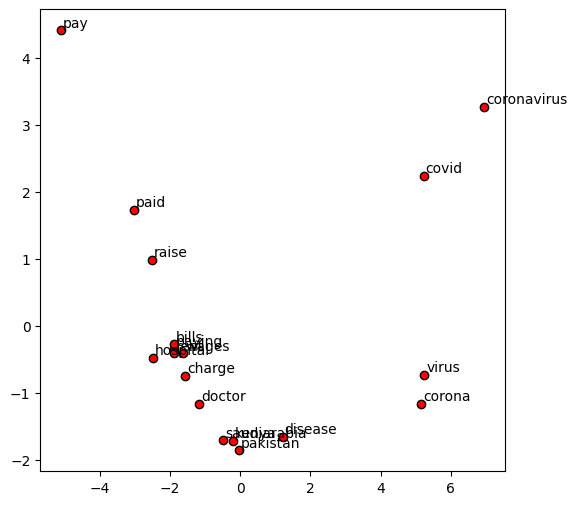

In [52]:
display_pca_scatterplot(cbow,['coronavirus', 'covid', 'virus', 'corona','disease', 'saudiarabia',  'doctor', 'hospital', 'pakistan', 'kenya',
                             'pay', 'paying', 'paid', 'wages', 'raise', 'bills', 'rent', 'charge'])

### Skip Gram

In [63]:
skipgram = Word2Vec(sentences=sentences, vector_size=100, window=5, sg=1)

In [66]:
skipgram.wv.index_to_key[:10]

['the', 'to', 'and', 'of', 'covid', 'a', 'in', 'coronavirus', 'for', 'is']

Everything is same as CBOW.

**Visualizing Skipgram**

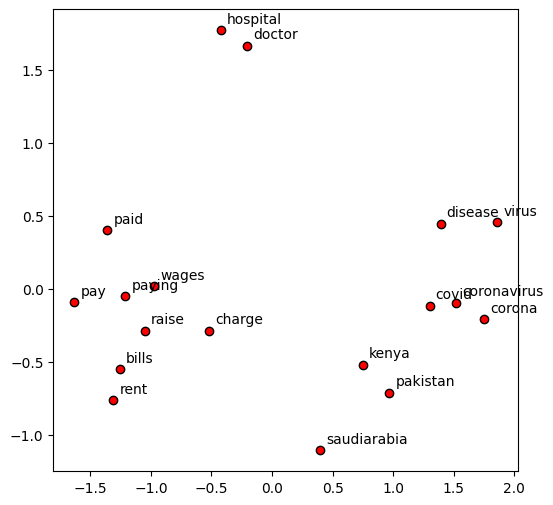

In [67]:
display_pca_scatterplot(skipgram,['coronavirus', 'covid', 'virus', 'corona','disease', 'saudiarabia',  'doctor', 'hospital', 'pakistan', 'kenya',
                             'pay', 'paying', 'paid', 'wages', 'raise', 'bills', 'rent', 'charge'])

### Exporting pre trained embeddings + Saving/Loading our model

In [68]:
import gensim.downloader
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [69]:
google_news = gensim.downloader.load('word2vec-google-news-300')
google_news.most_similar('twitter')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


[('Twitter', 0.8908904194831848),
 ('Twitter.com', 0.7536780834197998),
 ('tweet', 0.7431625723838806),
 ('tweeting', 0.7161932587623596),
 ('tweeted', 0.7137226462364197),
 ('facebook', 0.6988552808761597),
 ('tweets', 0.6974530816078186),
 ('Tweeted', 0.6950211524963379),
 ('Tweet', 0.6875007152557373),
 ('Tweeting', 0.6845167279243469)]

In [70]:
# w2v.save("word2vec.model")

In [71]:
# model = Word2Vec.load("word2vec.model")
# model.train([["hello", "world"]], total_examples=1, epochs=1)